In [20]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from os import listdir
from os.path import isfile, join

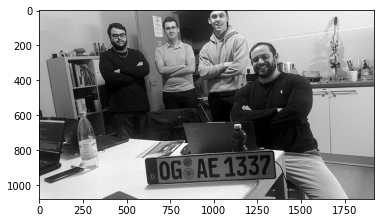

In [21]:
img = cv2.imread(r"D:\5_Integrationsseminar\Aufnahmen\still2.jpg")
#img = cv2.imread(r"D:/5_Integrationsseminar/Bilder/small/KZE_008.jpg")
dir=r"D:\5_Integrationsseminar\Bilder\small"
#images = [f for f in listdir(dir) if isfile(join(dir, f))]

#C:/Users/Kilian/Notebook/5_Semster/test_plates_kaggle/IMG_4134.jpg
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

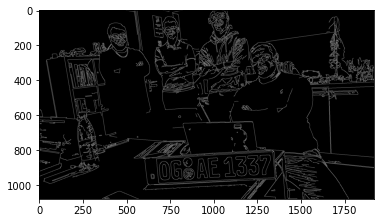

In [22]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 100) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

[[[1340  816]]

 [[ 674  850]]

 [[ 686  987]]

 [[1346  958]]]


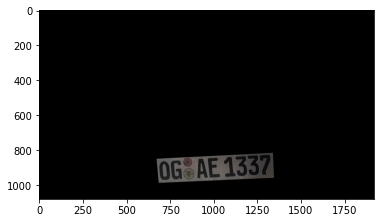

In [24]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

print(location)


mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


#ab hier nummern
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
#plt.show()


(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

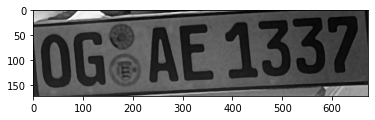

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 35], [163, 35], [163, 169], [0, 169]], '0G', 0.88047821302742), ([[222, 0], [673, 0], [673, 158], [222, 158]], 'AE 1337', 0.9906447845760764)]
---------------


In [25]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()


###########################################################
###########################################################
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
print(result)
print("---------------")

In [26]:
text=""
for x in result:
    print(x[1])
    print()
    print("---------------")
    text=text+x[1]
text

0G

---------------
AE 1337

---------------


'0GAE 1337'

NameError: name 'image' is not defined

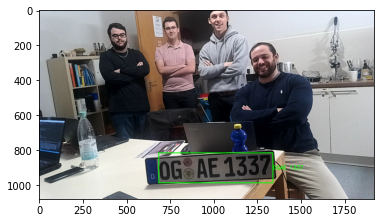

In [27]:
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.imsave(r"D:\5_Integrationsseminar\Aufnahmen\Result2.jpg",cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

# Perform text extraction
invert=image
data = pytesseract.image_to_string(invert, lang='eng', config='--psm 6')
print(data)

In [9]:
cv2.imshow('thresh', thresh)
cv2.imshow('opening', opening)
cv2.imshow('invert', invert)
cv2.waitKey()

for i in dic_ocr2:
    if i<biggest_box_last_layer:
        dic_ocr.pop(i)

TypeError: can only concatenate str (not "numpy.float64") to str

In [17]:
import cv2 
import pytesseract

img = cv2.imread('image.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

TypeError: Unsupported image object